In [42]:
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\Screenshot_6.png
input\test.jpg
input\Testing\glioma_tumor\image(1).jpg
input\Testing\glioma_tumor\image(10).jpg
input\Testing\glioma_tumor\image(100).jpg
input\Testing\glioma_tumor\image(11).jpg
input\Testing\glioma_tumor\image(12).jpg
input\Testing\glioma_tumor\image(13).jpg
input\Testing\glioma_tumor\image(14).jpg
input\Testing\glioma_tumor\image(15).jpg
input\Testing\glioma_tumor\image(16).jpg
input\Testing\glioma_tumor\image(17).jpg
input\Testing\glioma_tumor\image(18).jpg
input\Testing\glioma_tumor\image(19).jpg
input\Testing\glioma_tumor\image(2).jpg
input\Testing\glioma_tumor\image(20).jpg
input\Testing\glioma_tumor\image(21).jpg
input\Testing\glioma_tumor\image(22).jpg
input\Testing\glioma_tumor\image(23).jpg
input\Testing\glioma_tumor\image(24).jpg
input\Testing\glioma_tumor\image(25).jpg
input\Testing\glioma_tumor\image(26).jpg
input\Testing\glioma_tumor\image(27).jpg
input\Testing\glioma_tumor\image(28).jpg
input\Testing\glioma_tumor\image(29).jpg
input\Testing\glioma

In [43]:
%pip install tensorflow --user --upgrade
%pip install opencv-python --user --upgrade 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [44]:
import tensorflow as tf
import numpy as np # linear algebra
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle


In [45]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('input/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('input/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [46]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [48]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [49]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [51]:
import keras
import tensorflow as tf

print("Keras version: ", keras.__version__)
print("TensorFlow version: ", tf.__version__)

Keras version:  2.15.0
TensorFlow version:  2.15.0


In [52]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [53]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


17/83 [=====>........................] - ETA: 2:03 - loss: 3.4630 - accuracy: 0.2996

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

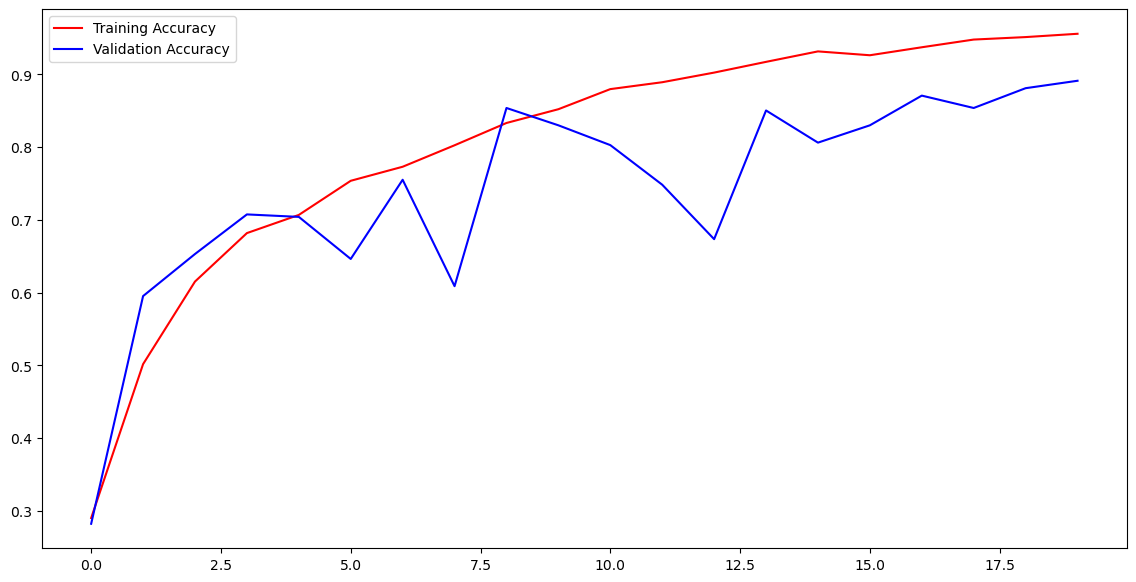

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

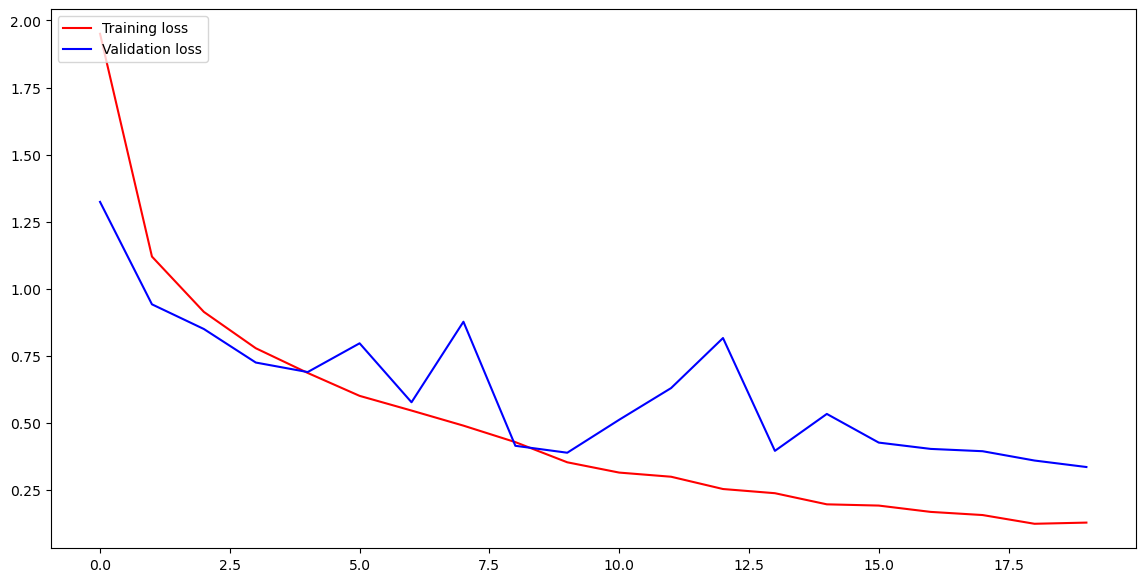

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread('input/Testing/glioma_tumor/image(100).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

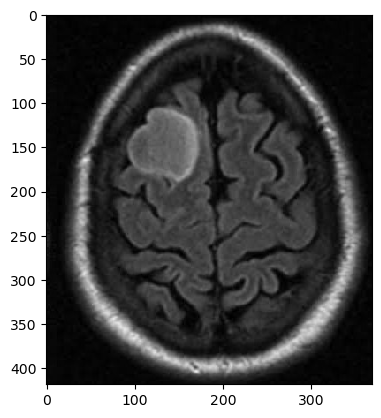

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('input/Testing/glioma_tumor/image(100).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
labels[indices]

1/1 [==============================] - 0s 153ms/step


'glioma_tumor'

In [ ]:
img = cv2.imread('input\Screenshot_6.png')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

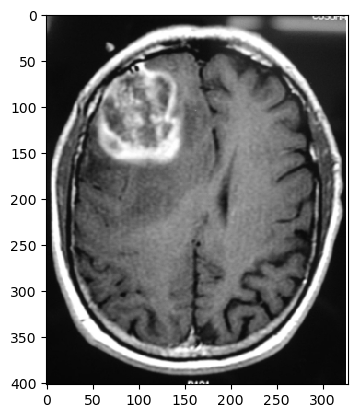

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('input\Screenshot_6.png')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
labels[indices]

1/1 [==============================] - 0s 36ms/step


'glioma_tumor'

In [ ]:
img = cv2.imread('input/test.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

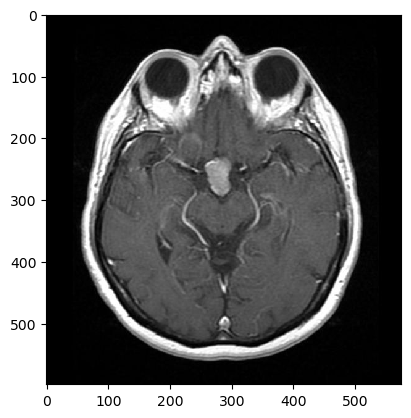

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('input/test.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
labels[indices]

1/1 [==============================] - 0s 16ms/step


'pituitary_tumor'